In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2, 1.6],
    [1, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])
Y=np.transpose(X)# dXn
Y

array([[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2. , 1. , 1.5, 1.1],
       [2.4, 0.7, 2.9, 2.2, 3. , 2.7, 1.6, 1.1, 1.6, 0.9]])

In [3]:
'''
meanY=np.mean(Y,axis=1)
print(Y,meanY)
Ymeaned=[[None]*len(Y[0]) for _ in range(len(Y))]
for i in range(len(Y)):
    for j in range(len(Y[0])):
        Ymeaned[i][j]=Y[i][j]-meanY[i]
Ymeaned
'''
Ymeaned=Y-np.mean(Y,axis=1,keepdims=True)
Ymeaned

array([[ 0.69, -1.31,  0.39,  0.09,  1.29,  0.49,  0.19, -0.81, -0.31,
        -0.71],
       [ 0.49, -1.21,  0.99,  0.29,  1.09,  0.79, -0.31, -0.81, -0.31,
        -1.01]])

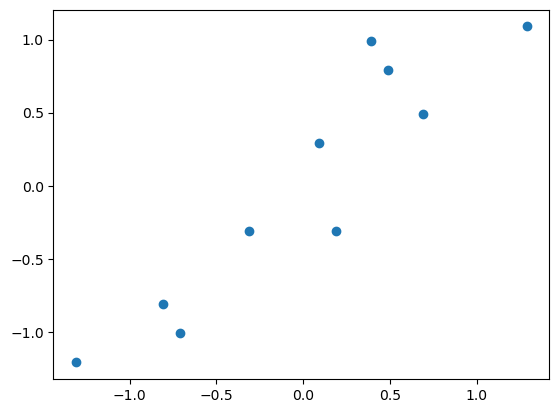

In [4]:
plt.scatter(Ymeaned[0],Ymeaned[1])

In [5]:
cov_matrix = np.cov(Ymeaned)
cov_matrix

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

In [6]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
eigenvalues, eigenvectors
#eigen vectors are column wise

(array([0.0490834 , 1.28402771]),
 array([[-0.73517866,  0.6778734 ],
        [ 0.6778734 ,  0.73517866]]))

In [7]:
sorted_index = np.argsort(eigenvalues)[::-1]   # descending order
eigenvalues = eigenvalues[sorted_index]
eigenvectors = eigenvectors[:, sorted_index]
eigenvalues,eigenvectors

(array([1.28402771, 0.0490834 ]),
 array([[ 0.6778734 , -0.73517866],
        [ 0.73517866,  0.6778734 ]]))

In [8]:
k = 1
eigenvectors_subset = eigenvectors[:, :k]
eigenvectors_subset

array([[0.6778734 ],
       [0.73517866]])

In [9]:
Y_reduced = np.dot(eigenvectors_subset.T,Ymeaned)
Y_reduced

array([[ 0.82797019, -1.77758033,  0.99219749,  0.27421042,  1.67580142,
         0.9129491 , -0.09910944, -1.14457216, -0.43804614, -1.22382056]])

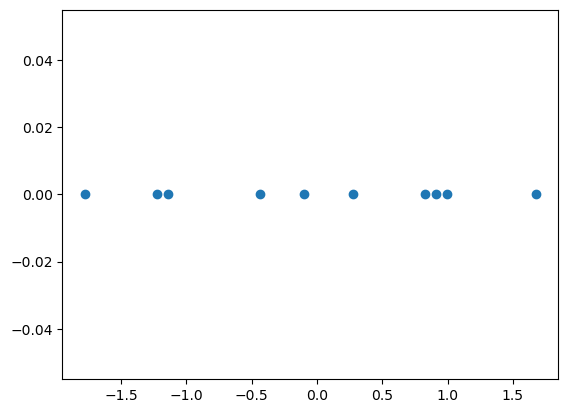

In [10]:
plt.scatter(Y_reduced,np.zeros_like(Y_reduced))

In [11]:
print("Original Data Shape:", Y.shape)
print("Reduced Data Shape:", Y_reduced.shape)
print("Reduced Data (1D projection):")
print(Y_reduced,eigenvectors_subset)


Original Data Shape: (2, 10)
Reduced Data Shape: (1, 10)
Reduced Data (1D projection):
[[ 0.82797019 -1.77758033  0.99219749  0.27421042  1.67580142  0.9129491
  -0.09910944 -1.14457216 -0.43804614 -1.22382056]] [[0.6778734 ]
 [0.73517866]]


In [12]:
mean = np.mean(Y, axis=1,keepdims=True)
line_points = np.dot( eigenvectors_subset,Y_reduced) +mean
line_points

array([[2.37125896, 0.60502558, 2.48258429, 1.99587995, 2.9459812 ,
        2.42886391, 1.74281635, 1.03412498, 1.51306018, 0.9804046 ],
       [2.51870601, 0.60316089, 2.63944242, 2.11159364, 3.14201343,
        2.58118069, 1.83713686, 1.06853498, 1.58795783, 1.01027325]])

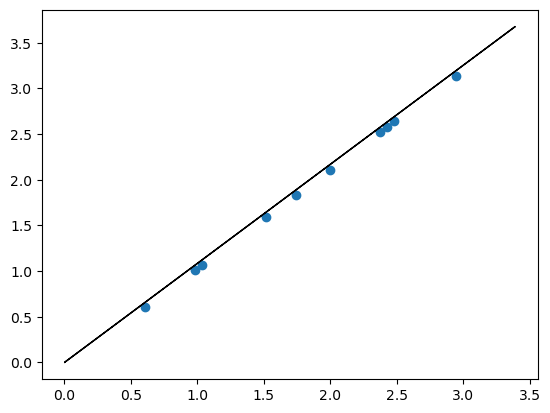

In [13]:
plt.scatter(line_points[0],line_points[1])
plt.arrow(0,0,eigenvectors_subset[0][0]*5,eigenvectors_subset[1][0]*5)